# 🖼️ Color Image Merge and Subtraction

In this notebook, we will explore **image merging and subtraction** using OpenCV (`cv2`) and Matplotlib.  
We will use the following images stored in the `assets/` folder:

- `assets/Image.jpg`
- `assets/Image1.jpg`
- `assets/Image2.jpg`
- `assets/background.jpg`

## Objectives
1. Load and display color images.
2. Merge multiple images together using weighted addition.
3. Perform image subtraction to highlight differences.
4. Visualize results clearly.


In [1]:
# 📌 Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images side by side
def show_images(titles, images, cmap=None):
    plt.figure(figsize=(15,5))
    for i, (title, img) in enumerate(zip(titles, images)):
        plt.subplot(1, len(images), i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap=cmap)
        else:  # color
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()


## 1. Load Images

We will load four images:
- A main image (`Image.jpg`)
- Two additional overlay images (`Image1.jpg`, `Image2.jpg`)
- A background image (`background.jpg`)


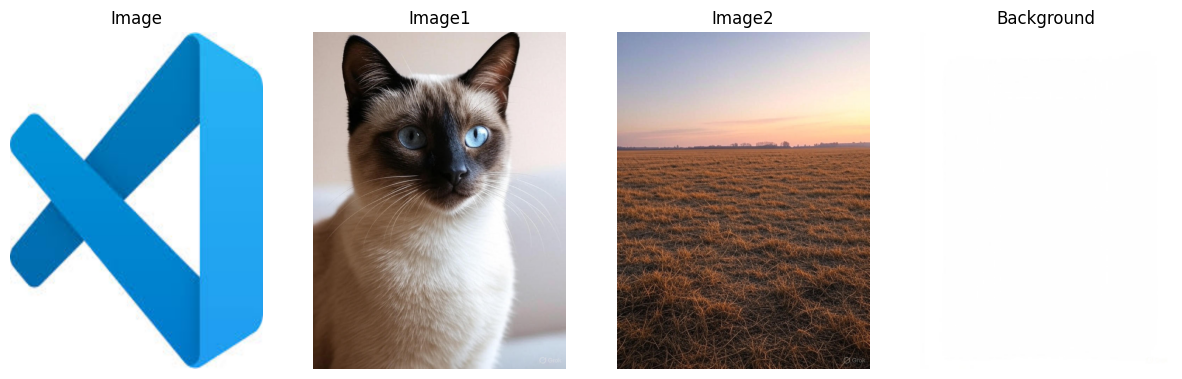

In [2]:
# Load images
img = cv2.imread("assets/Image.jpg")
img1 = cv2.imread("assets/image1.jpeg")
img2 = cv2.imread("assets/image2.jpg")
background = cv2.imread("assets/background.jpeg")

# Resize to the same size for consistency
h, w = background.shape[:2]
img = cv2.resize(img, (w, h))
img1 = cv2.resize(img1, (w, h))
img2 = cv2.resize(img2, (w, h))

# Show loaded images
show_images(["Image", "Image1", "Image2", "Background"], [img, img1, img2, background])


## 2. Image Merging (Blending)

We can combine two or more images using **weighted addition**.  
Formula:

\[
\text{Merged} = \alpha \cdot \text{Image1} + \beta \cdot \text{Image2} + \gamma
\]

Where:
- **α** and **β** are blending weights (between 0 and 1).
- **γ** is a scalar added to each sum (often 0).

Let’s merge:
- `Image` with `Image1`
- `Image1` with `Image2`
- A combination with `background`


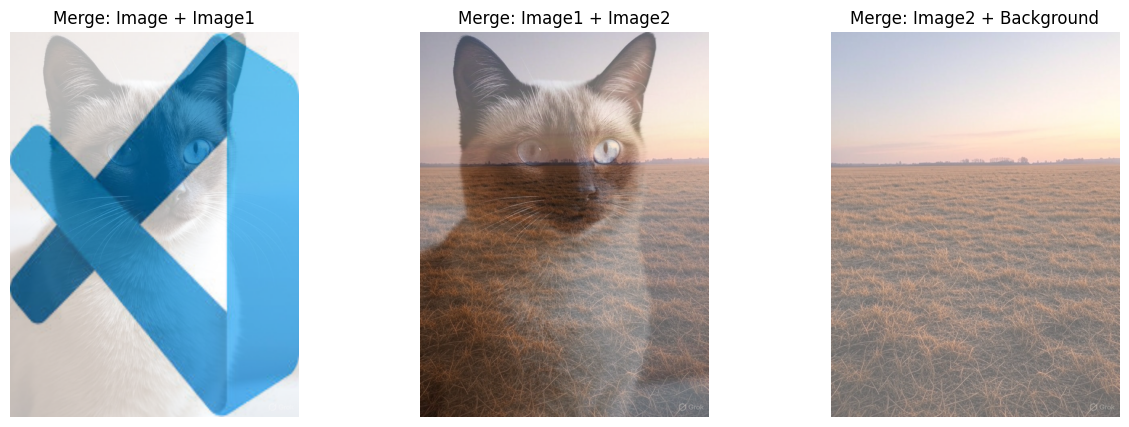

In [3]:
# Merge examples
merge1 = cv2.addWeighted(img, 0.7, img1, 0.3, 0)
merge2 = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
merge3 = cv2.addWeighted(img2, 0.6, background, 0.4, 0)

# Show results
show_images(["Merge: Image + Image1", "Merge: Image1 + Image2", "Merge: Image2 + Background"],
            [merge1, merge2, merge3])


## 3. Image Subtraction

Subtraction is useful for detecting differences between two images.  
Formula:

\[
\text{Difference} = \text{Image1} - \text{Image2}
\]

OpenCV provides `cv2.subtract(img1, img2)` which ensures no negative pixel values (values below 0 become 0).


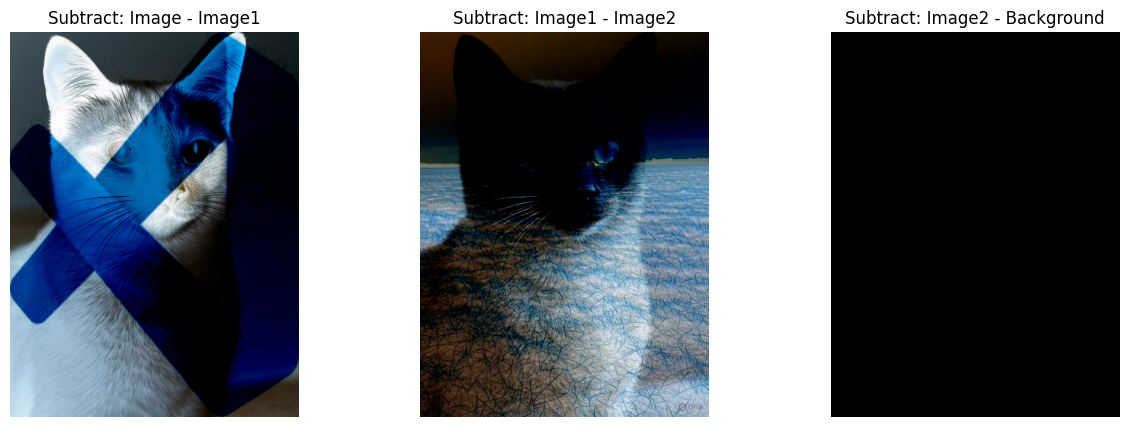

In [4]:
# Perform subtraction
sub1 = cv2.subtract(img, img1)
sub2 = cv2.subtract(img1, img2)
sub3 = cv2.subtract(img2, background)

# Show results
show_images(["Subtract: Image - Image1", "Subtract: Image1 - Image2", "Subtract: Image2 - Background"],
            [sub1, sub2, sub3])


## 4. Observations

- **Merging** creates a blended effect where both images contribute to the final result depending on their weights.
- **Subtraction** highlights differences — regions that are similar become dark (close to black), while differing regions remain bright.
- These techniques are widely used in:
  - **Watermarking**
  - **Image overlays**
  - **Change detection** in computer vision.

---

✅ We have successfully demonstrated **color image merging and subtraction** using OpenCV.
